# Glass Classification

This task involves creating a Logistic Regression and KNN classifier to classify glass based on numerous features.

## Training the Models

Begin by reading in the data from the glass.csv file. Import files as needed.

In [12]:
import pandas as pd
data = pd.read_csv('glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Use the seaborn library to visualize your data. What features seem to be the most important in differentiation different types of glass?

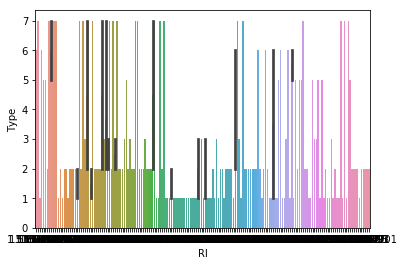

In [21]:
import seaborn
seaborn.barplot(x = 'RI', y = 'Type', data = data)

Using pandas, turn the dataframe you just created from the csv file into two different dataframs: one containing the features to be used for classification, and another containing the labels for each sample.

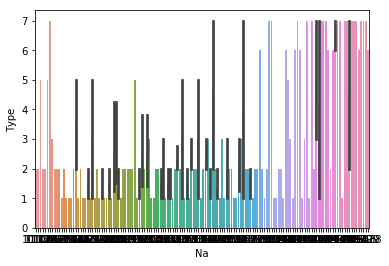

In [16]:
seaborn.barplot(x = 'Na', y = 'Type', data = data)

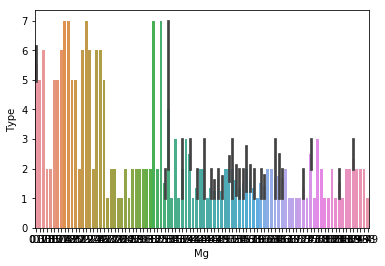

In [18]:
seaborn.barplot(x = 'Mg', y = 'Type', data = data)

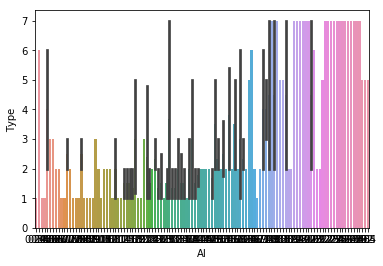

In [19]:
seaborn.barplot(x = 'Al', y = 'Type', data = data)

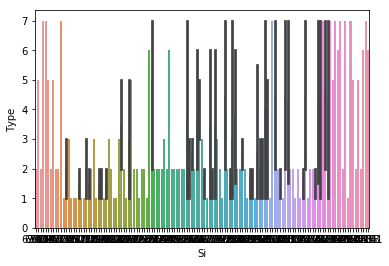

In [22]:
seaborn.barplot(x = 'Si', y = 'Type', data = data)

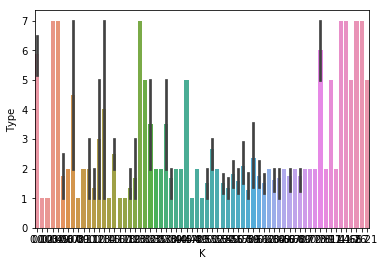

In [23]:
seaborn.barplot(x = 'K', y = 'Type', data = data)

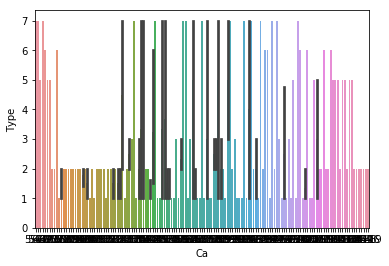

In [24]:
seaborn.barplot(x = 'Ca', y = 'Type', data = data)

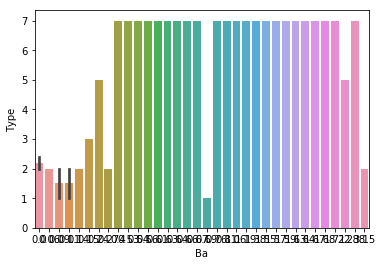

In [25]:
seaborn.barplot(x = 'Ba', y = 'Type', data = data)

Convert the dataframes to numpy arrays and store them in two different variables.

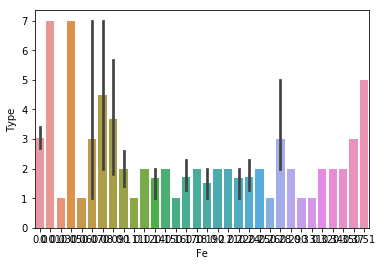

In [26]:
seaborn.barplot(x = 'Fe', y = 'Type', data = data)

Use scikit learn's train_test_split function to split the data into a training set and a testing/evaluation set. Use a 70 / 30 split.

In [32]:
X = data.drop("Type", 1)
Y = data["Type"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

Create a logistic regression classifier and fit it on the glass data.

In [34]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

C:\Users\vohra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vohra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Create a k nearest neighbours classifies and fit it on the glass data.


In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

## Evaluating model performance

Begin by computing the accuracy of each model on the testing set. Recall the drawbacks associated with this measure and why we cannot rely only on accuracy to give a complete picture of model performance. 

In [41]:
from sklearn.metrics import accuracy_score
y_pred_lr = lr_clf.predict(X_test)
y_pred_knn = knn_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_lr))
print(accuracy_score(y_test, y_pred_knn))

0.5076923076923077
0.6461538461538462


Use sklearn to confusion matrices for the logistic regression classifier's predictions and for the knn classifier's predictions.

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[13,  2,  0,  0,  0,  0],
       [17,  8,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0],
       [ 0,  3,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  0,  3],
       [ 0,  1,  0,  1,  0, 10]], dtype=int64)

Use the following function in order to format and display your confucion matrix nicely. The code uses the popular library seaborn, and though it is not essential for you to understand it, it is strongly recommended that you try and investigate the code on your own time.

In [45]:
import itertools
import matplotlib.pyplot as plt

%matplotlib inline
def format_confusion_matrix_nicely(cm):
    title = 'Confusion Matrix'
    cmap = plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(label_df.nunique())
    plt.xticks(tick_marks, [1, 2, 3, 4, 5, 6], rotation=45)
    plt.yticks(tick_marks, [1, 2, 3, 4, 5, 6])

    #don't worry about understanding these lines, they just format the grid nicely. 
    #You can get them from the documentation anytime you want!
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Compute the prediction biases of each model. Read more about prediction bias here: https://developers.google.com/machine-learning/crash-course/classification/prediction-bias.

Use sklearn and matplotlib to compute the prediction and recall for each model on each class. Plot these measures using matplotlib.

**Congratulations!** You were given a problem, analyzed the data on how to solve the problem, trained machine learning models to serve as classifiers, and evaluated the model's performance.